In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow import keras
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("phishing_site_urls.csv")

In [3]:
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [4]:
df["Label"] = df["Label"].apply(lambda x: 1 if x == "bad" else 0)

In [5]:
df[df["Label"]==0]

,URL,Label
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,0
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,0
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,0
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,0
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,0
...,...,...
483590,youthleaguesusa.com/potomacsoccer/2011/Tournam...,0
483591,zip-codes.com/,0
483592,owens.edu/news-releases/?p=2052,0
483593,1.safesecureweb.com/egale/index.asp?item=1173,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ MB


In [7]:
df.describe()

,Label
count,549346.000000
mean,0.284742
std,0.451292
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
# Count the number of data in each label
label_counts = df['Label'].value_counts()
label_counts

Label
0    392924
1    156422
Name: count, dtype: int64

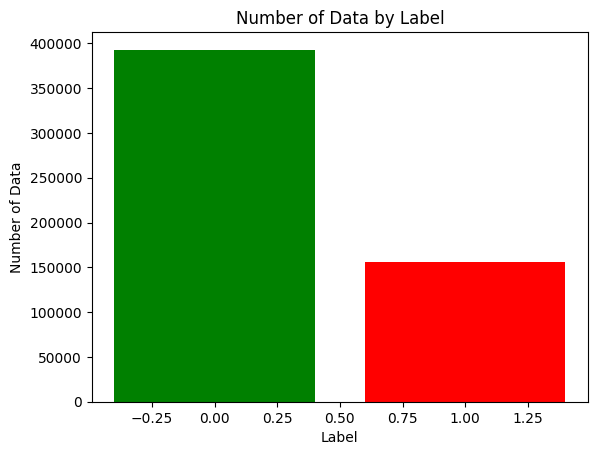

In [9]:
# Define colors based on label value
colors = ['green' if val == 0 else 'red' for val in label_counts.index]

# Create a bar chart
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Number of Data by Label')
plt.show()

In [10]:
# Identify minority class and count
minority_class = label_counts.idxmin()
minority_count = label_counts.min()

# Filter data to keep only minority class and a random sample of the majority class to match minority count
df_balanced = pd.concat([df[df['Label'] == minority_class], df[df['Label'] != minority_class].sample(minority_count)])
df_balanced

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1
...,...,...
316974,drawnandquarterly.com/newsList.php?st=art&art=...,0
65615,tools.ietf.org/html/rfc2389,0
393685,msnbc.msn.com/id/45321712,0
419156,quincyjones.com/,0


In [11]:
# Count the number of data in each label
label_counts = df_balanced['Label'].value_counts()
label_counts

Label
1    156422
0    156422
Name: count, dtype: int64

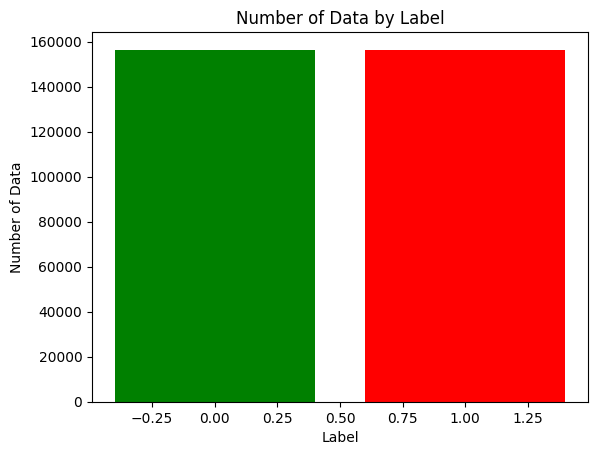

In [12]:
# Define colors based on label value
colors = ['green' if val == 0 else 'red' for val in label_counts.index]

# Create a bar chart
plt.bar(label_counts.index, label_counts.values, color=colors)
plt.xlabel('Label')
plt.ylabel('Number of Data')
plt.title('Number of Data by Label')
plt.show()

In [13]:
df=df_balanced

In [14]:
y = df["Label"].to_numpy()
X = df["URL"]

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [16]:
max_len = max(len(seq) for seq in sequences)
X_features = pad_sequences(sequences, maxlen=max_len)

In [17]:
model = Sequential()

# Input layer with number of features
model.add(Dense(units=16, activation="relu", input_dim=X_features.shape[1]))

# Hidden Layers
# model.add(Dense(units=32, activation="relu"))

model.add(Dense(units=64, activation="relu"))

model.add(Dense(units=128, activation="relu"))

model.add(Dense(units=64, activation="relu"))

# model.add(Dense(units=32, activation="relu"))

model.add(Dense(units=16, activation="relu"))

# Output layer for binary classification
model.add(Dense(units=1, activation="sigmoid"))

In [18]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_features, y, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
15643/15643 [==============================] - 79s 5ms/step - loss: 1.1856 - accuracy: 0.7330 - val_loss: 0.7820 - val_accuracy: 0.5936
Epoch 2/100
15643/15643 [==============================] - 73s 5ms/step - loss: 0.5531 - accuracy: 0.7783 - val_loss: 0.6915 - val_accuracy: 0.6390
Epoch 3/100
15643/15643 [==============================] - 74s 5ms/step - loss: 0.5214 - accuracy: 0.7859 - val_loss: 0.7420 - val_accuracy: 0.6104
Epoch 4/100
15643/15643 [==============================] - 73s 5ms/step - loss: 0.5173 - accuracy: 0.7882 - val_loss: 0.7048 - val_accuracy: 0.6204
Epoch 5/100
15643/15643 [==============================] - 74s 5ms/step - loss: 0.4646 - accuracy: 0.8111 - val_loss: 0.6256 - val_accuracy: 0.6220
Epoch 6/100
15643/15643 [==============================] - 72s 5ms/step - loss: 0.4680 - accuracy: 0.8237 - val_loss: 0.6283 - val_accuracy: 0.6306
Epoch 7/100
15643/15643 [==============================] - 74s 5ms/step - loss: 0.4397 - accuracy: 0.8228 - val_

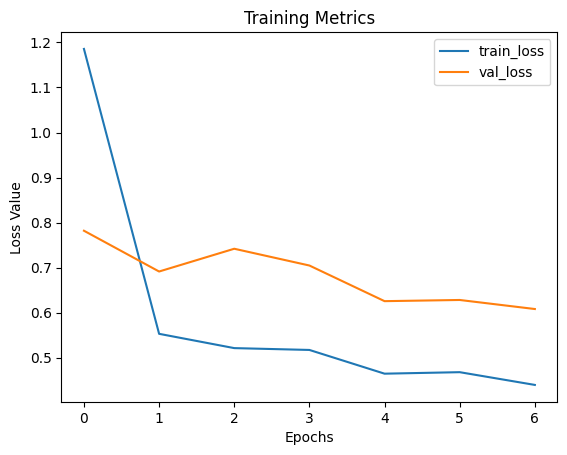

In [20]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Training Metrics')
plt.legend()
plt.show()

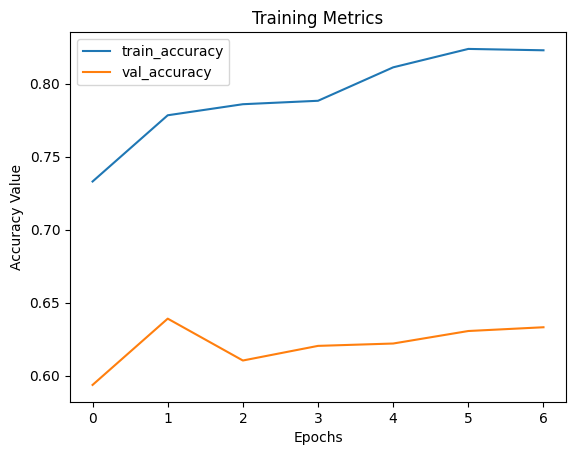

In [21]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.title('Training Metrics')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                2848      
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 16)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 21569 (84.25 KB)
Trainable params: 21569 (

In [23]:
def preprocess_url(new_url):
    # Tokenize the new URL
    new_sequence = tokenizer.texts_to_sequences([new_url])
    # Pad the sequence
    new_sequence_padded = pad_sequences(new_sequence, maxlen=max_len)
    return new_sequence_padded

In [24]:
def predict_url(new_url):
    # Preprocess the new URL
    new_sequence_padded = preprocess_url(new_url)
    # Make a prediction
    prediction = model.predict(new_sequence_padded)
    # Return the predicted label
    return 'bad' if prediction[0][0] > 0.5 else 'good'

In [25]:
new_url = "chenowethsite.com/chennmc5.htm"
predicted_label = predict_url(new_url)
print(f"The URL '{new_url}' is predicted to be '{predicted_label}'")

1/1 [==============================] - 0s 223ms/step
The URL 'chenowethsite.com/chennmc5.htm' is predicted to be 'bad'


In [26]:
new_url = "www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php"
predicted_label = predict_url(new_url)
print(f"The URL '{new_url}' is predicted to be '{predicted_label}'")


1/1 [==============================] - 0s 17ms/step
The URL 'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php' is predicted to be 'bad'


In [27]:
model.save('phishing_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
import pickle
with open('phishing_tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
from google.colab import files

# Download the model
files.download('phishing_model.h5')

# Download the tokenizer
files.download('phishing_tokenizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>